In [1]:
# Importando as bibliotecas necessarias
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
import pandas as pd
from scipy.stats import mode, pearsonr, spearmanr
import glob, os
from sklearn.metrics import confusion_matrix
pd.set_option("display.max_rows", 300)

In [2]:
y_train_vali = np.load('y_train_vali.npy')
y_test = np.load('y_test.npy')

# Divide em classes de acordo com a os quartis do dado de treino/vali
quart = np.quantile(y_train_vali,[0.25, 0.5, 0.75])
print(quart)
y_train_vali_class = np.digitize(y_train_vali, quart)
y_test_class = np.digitize(y_test, quart)
print((y_train_vali_class).shape)
print((y_test_class).shape)

[0.13   0.175  0.2125]
(144, 1)
(63, 1)


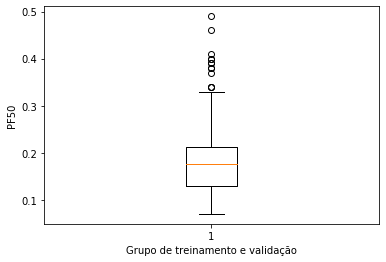

In [3]:
plt.figure()
plt.boxplot(y_train_vali)
plt.ylabel('PF50')
plt.xlabel('Grupo de treinamento e validação')
plt.savefig('Boxplot_treino_vali.png')
plt.show()

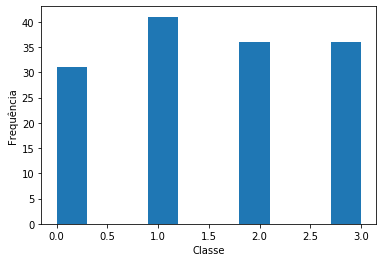

In [4]:
plt.figure()
plt.hist(y_train_vali_class)
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.savefig('Histograma_treino_vali.png')
plt.show()

In [5]:
# Read xlsx with nets info
df_nets = pd.read_excel('SELECTED_NETS.xlsx', index_col=None, header=0)

In [6]:
leave_out = [21, 20, 23, 55, 5, 41, 60, 31]
all_patients = range(63)
selected_patients = list(set(all_patients) - set(leave_out))

In [7]:
# New Acc

all_predicted = np.empty([df_nets.shape[0], 55])
new_acc = np.empty([df_nets.shape[0]])
classTarget = np.load('y_test_class.npy')
classTarget_8out = classTarget[selected_patients]
for net_number in range(df_nets.shape[0]):
    netX = df_nets.iloc[net_number]
    net_predicted_str = netX['test_predicted'][1:-1].replace("\n", "")
    net_predicted = np.fromstring(net_predicted_str, dtype=int, sep=' ')
    net_predicted_8out = net_predicted[selected_patients]
    all_predicted[net_number] = net_predicted[selected_patients]
    
    new_acc[net_number] = np.sum(classTarget_8out.squeeze()==net_predicted_8out.squeeze())/len(classTarget_8out)*100

df_nets['new_acc'] = new_acc
print(max(new_acc))

47.27272727272727


(10, 55)


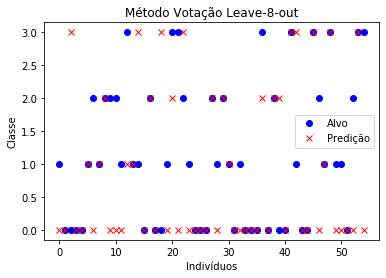

Errors: 24; Accuracy: 56.363636%
R-corrcoef: 0.4409276420663171
[[17  0  1  2]
 [ 8  5  0  2]
 [ 5  0  5  1]
 [ 2  1  2  4]]
[[85.          0.          5.         10.        ]
 [53.33333333 33.33333333  0.         13.33333333]
 [45.45454545  0.         45.45454545  9.09090909]
 [22.22222222 11.11111111 22.22222222 44.44444444]]


In [8]:
all_predicted = np.empty([df_nets.shape[0], 55])
for net_number in range(df_nets.shape[0]):
    netX = df_nets.iloc[net_number]
    net_predicted_str = netX['test_predicted'][1:-1].replace("\n", "")
    net_predicted = np.fromstring(net_predicted_str, dtype=int, sep=' ')
    all_predicted[net_number] = net_predicted[selected_patients]

print(all_predicted.shape)

voteClassOut, count = mode(all_predicted, axis=0)
# print(voteClassOut)
voteClassOut = voteClassOut.reshape(55,1)

classTarget = np.load('y_test_class.npy')
classTarget_8out = classTarget[selected_patients]
# print(classTarget.reshape(1, 63))

plt.figure()
plt.plot(classTarget_8out, 'ob', label='Alvo')
plt.plot(voteClassOut, 'xr', label='Predição')
plt.xlabel('Indivíduos')
plt.ylabel('Classe')
plt.title('Método Votação Leave-8-out')
plt.legend()
plt.savefig('Vote_leave8out.png')
plt.show()

error_count = len(classTarget_8out) - np.count_nonzero((classTarget_8out.squeeze() == voteClassOut.squeeze()))
acc = np.sum(classTarget_8out.squeeze()==voteClassOut.squeeze())/len(classTarget_8out)*100
r = np.corrcoef(voteClassOut.squeeze(), classTarget_8out.squeeze())[0,1]

print('Errors: %d; Accuracy: %f%%' % (error_count, acc))
print('R-corrcoef: %s' % (str(r)))

# Confusion matrix
C = confusion_matrix(classTarget_8out,voteClassOut, labels=[0, 1, 2, 3])
C_perc = C/np.sum(C, axis=1, keepdims=True)*100
print(C)
print(C_perc)

(10, 8)


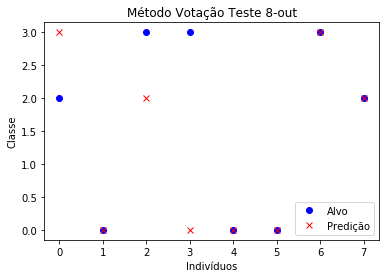

Errors: 3; Accuracy: 62.500000%
R-corrcoef: 0.6393293950763895
[[3 0 0 0]
 [0 0 0 0]
 [0 0 1 1]
 [1 0 1 1]]
[[100.           0.           0.           0.        ]
 [         nan          nan          nan          nan]
 [  0.           0.          50.          50.        ]
 [ 33.33333333   0.          33.33333333  33.33333333]]


D:\anaconda3\envs\zika\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


In [9]:
all_predicted = np.empty([df_nets.shape[0], 8])
for net_number in range(df_nets.shape[0]):
    netX = df_nets.iloc[net_number]
    net_predicted_str = netX['test_predicted'][1:-1].replace("\n", "")
    net_predicted = np.fromstring(net_predicted_str, dtype=int, sep=' ')
    all_predicted[net_number] = net_predicted[leave_out]

print(all_predicted.shape)

voteClassOut, count = mode(all_predicted, axis=0)
# print(voteClassOut)
voteClassOut = voteClassOut.reshape(8,1)

classTarget = np.load('y_test_class.npy')
classTarget_8out = classTarget[leave_out]

plt.figure()
plt.plot(classTarget_8out, 'ob', label='Alvo')
plt.plot(voteClassOut, 'xr', label='Predição')
plt.xlabel('Indivíduos')
plt.ylabel('Classe')
plt.title('Método Votação Teste 8-out')
plt.legend()
plt.savefig('Vote_test8out.png')
plt.show()

error_count = len(classTarget_8out) - np.count_nonzero((classTarget_8out.squeeze() == voteClassOut.squeeze()))
acc = np.sum(classTarget_8out.squeeze()==voteClassOut.squeeze())/len(classTarget_8out)*100
r = np.corrcoef(voteClassOut.squeeze(), classTarget_8out.squeeze())[0,1]

print('Errors: %d; Accuracy: %f%%' % (error_count, acc))
print('R-corrcoef: %s' % (str(r)))

# Confusion matrix
C = confusion_matrix(classTarget_8out,voteClassOut, labels=[0, 1, 2, 3])
C_perc = C/np.sum(C, axis=1, keepdims=True)*100
print(C)
print(C_perc)